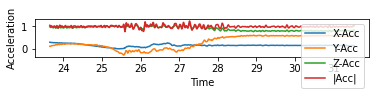

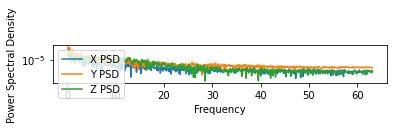

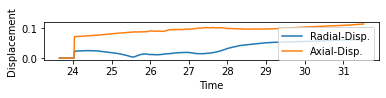

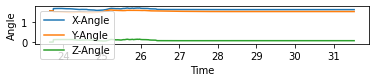

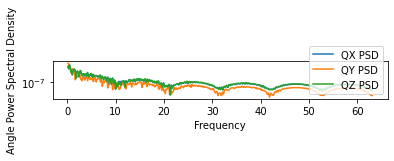

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy.fft import fft
from numpy import exp
from pyquaternion import Quaternion 
dfa= pd.read_csv('\MiniG\SensorAnalysis\SensorAnalysis\data\endaq1.csv')
dfb= pd.read_csv('\MiniG\SensorAnalysis\SensorAnalysis\data\endaq-sample-rotation.csv')
#dfa = pd.read_csv('sample.csv')
#initialize variables
#==================
dfa.columns = ['t','x','y','z']
dfb.columns = ['t','w','i','j','k']
initdp=3000
findp=4000
freqin=2
io=[0,0,1]
t = dfa['t'][initdp:findp]
for q in range(findp-initdp):
    t[initdp+q]=t[initdp+q]-dfa['t'][0]
ts = t[initdp+2]-t[initdp+1]
plt.figure()
Sx=dfa['x'][initdp:findp].values.tolist()
Sy=dfa['y'][initdp:findp].values.tolist()
Sz=dfa['z'][initdp:findp].values.tolist()
T=t[findp-1]-t[initdp]
tss = [0]
for e in range(findp-initdp-1):
    tss.append(e/(ts*(findp-initdp)))
#==================
#Computation
#==================
ac=dfa['x'][initdp:findp]**2+dfa['y'][initdp:findp]**2+dfa['z'][initdp:findp]**2
vx,vy,vz=[0],[0],[0]
for j in range(findp-initdp-1):
    vx.append(vx[j]+dfa['x'][initdp+j]*ts)
    vy.append(vy[j]+dfa['y'][initdp+j]*ts)
    vz.append(vz[j]+dfa['z'][initdp+j]*ts)
dx,dy,dz = 49*[0]+[ts*np.sum(vx[0:49])],49*[0]+[ts*np.sum(vy[0:49])],49*[0]+[ts*np.sum(vz[0:49])]    
for j in range(findp-initdp-50):
    dx.append(ts*np.sum(vx[j+1:51+j])-49*ts*vx[j+1])
    dy.append(ts*np.sum(vy[j+1:51+j])-49*ts*vy[j+1])
    dz.append(ts*np.sum(vz[j+1:51+j])-49*ts*vz[j+1])
rd = [0]
for j in range(findp-initdp-1):
    rd.append(np.sqrt(dx[j+1]**2+dy[j+1]**2))
r = Quaternion([dfb['w'][0],dfb['i'][0],dfb['j'][0],dfb['k'][0]]) 
angx = [np.arccos(r.rotate(io)[0])]
angy = [np.arccos(r.rotate(io)[1])]
angz = [np.arccos(r.rotate(io)[2])]
for i in range(findp-initdp-1):
    r = Quaternion([dfb['w'][i+1],dfb['i'][i+1],dfb['j'][i+1],dfb['k'][i+1]])
    angx.append(np.arccos(r.rotate(io)[0]))
    angy.append(np.arccos(r.rotate(io)[1]))
    angz.append(np.arccos(r.rotate(io)[2]))
#==================
#Plot block
#==================
plt.subplot(5,1,1)
if findp>initdp:
    plt.plot(t,dfa['x'][initdp:findp],label = 'X-Acc')
    plt.plot(t,dfa['y'][initdp:findp],label = "Y-Acc")
    plt.plot(t,dfa['z'][initdp:findp],label = "Z-Acc")
    plt.plot(t,ac,label = "|Acc|")
else:
    print('Invalid Range')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.show()
#==================
#Plot block
#==================
plt.subplot(5,1,2)
plt.plot(tss[freqin:(findp-initdp)//2],abs((2*fft(Sx)[freqin:(findp-initdp)//2])/(findp-initdp))**2,label = "X PSD")
plt.plot(tss[freqin:(findp-initdp)//2],abs((2*fft(Sy)[freqin:(findp-initdp)//2])/(findp-initdp))**2,label = "Y PSD")
plt.plot(tss[freqin:(findp-initdp)//2],abs((2*fft(Sz)[freqin:(findp-initdp)//2])/(findp-initdp))**2,label = "Z PSD")
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.yscale("log")
plt.legend()
plt.show()
#==================
#Plot block
#==================
plt.subplot(5,1,3)
plt.plot(t,rd,label = "Radial-Disp.")
plt.plot(t,dz,label = "Axial-Disp.")
plt.xlabel('Time')
plt.ylabel('Displacement')  
plt.legend()
plt.show()
#==================
#Plot block
#==================
plt.subplot(5,1,4)
plt.plot(t,angx,label = "X-Angle")
plt.plot(t,angy,label = "Y-Angle")
plt.plot(t,angz,label = "Z-Angle")
plt.xlabel('Time')
plt.ylabel('Angle')  
plt.legend()
plt.show()
#==================
#Plot block
#==================
plt.subplot(5,1,5)
plt.plot(tss[freqin:(findp-initdp)//2],abs((2*fft(angx)[freqin:(findp-initdp)//2])/(findp-initdp))**2,label = "QX PSD")
plt.plot(tss[freqin:(findp-initdp)//2],abs((2*fft(angy)[freqin:(findp-initdp)//2])/(findp-initdp))**2,label = "QY PSD")
plt.plot(tss[freqin:(findp-initdp)//2],abs((2*fft(angz)[freqin:(findp-initdp)//2])/(findp-initdp))**2,label = "QZ PSD")
plt.xlabel('Frequency')
plt.ylabel('Angle Power Spectral Density')
plt.yscale("log")
plt.legend()
plt.show()
#==================